In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 13.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 13.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 15.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------- ------------------------------ 1.6/7.0 MB 18.2 MB/s eta 0:00:01
   ------------------------ --------------- 4.2/7.0 MB 9.5 MB/s eta 0:00:01
   ------------------------------ --------- 5.2/7.0 MB 8.6 MB/s eta 0:00:01
   ------------------------------------- -- 6.6/7.0 MB 7.5 MB/s eta 0:00:01
   -----------------------------

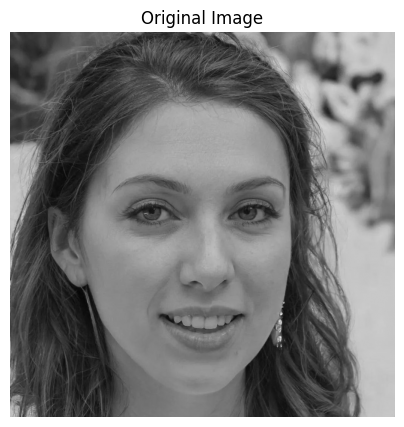

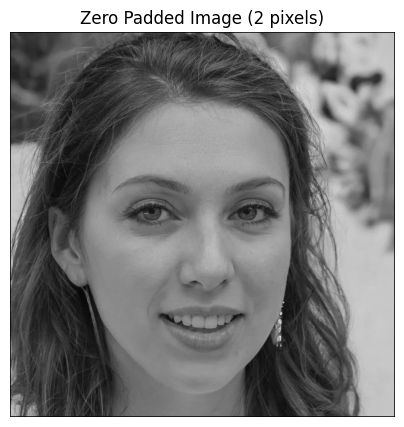

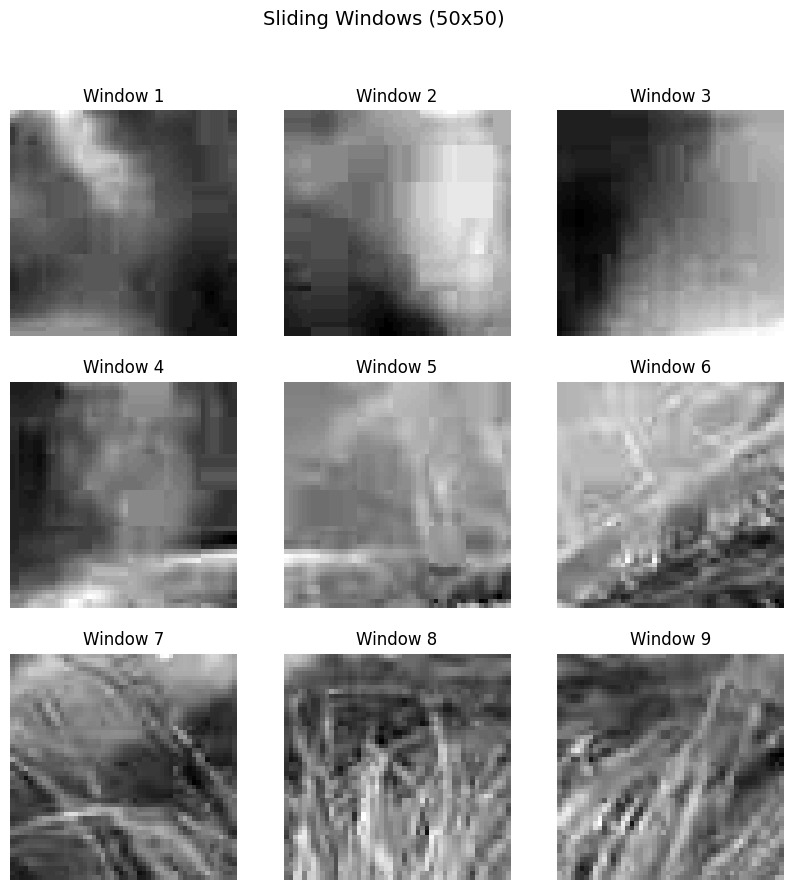

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load sample image from OpenCV
# You can also upload your own image
img = cv2.imread(cv2.samples.findFile("real.jpg"), cv2.IMREAD_GRAYSCALE)

# Show original image
plt.figure(figsize=(5,5))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

# -------- Padding Example --------
# Pad image with zeros (2 pixels on each side)
padded_img = np.pad(img, pad_width=2, mode='constant', constant_values=0)

plt.figure(figsize=(5,5))
plt.title("Zero Padded Image (2 pixels)")
plt.imshow(padded_img, cmap='gray')
plt.axis("off")
plt.show()

# -------- Sliding Window Example --------
def sliding_window(image, step_size, window_size):
    """
    Slide a window across the image.
    """
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Apply sliding window
window_size = (50, 50)  # width, height
step_size = 50

plt.figure(figsize=(10,10))
for i, (x, y, window) in enumerate(sliding_window(img, step_size, window_size)):
    if i >= 9:  # show only first 9 windows
        break
    plt.subplot(3,3,i+1)
    plt.imshow(window, cmap="gray")
    plt.title(f"Window {i+1}")
    plt.axis("off")
plt.suptitle("Sliding Windows (50x50)", fontsize=14)
plt.show()

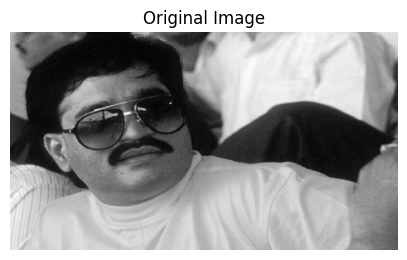

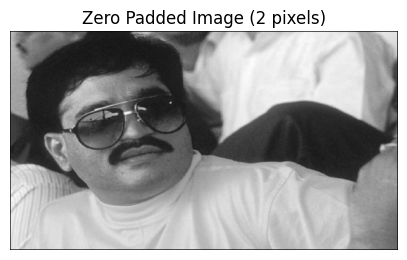

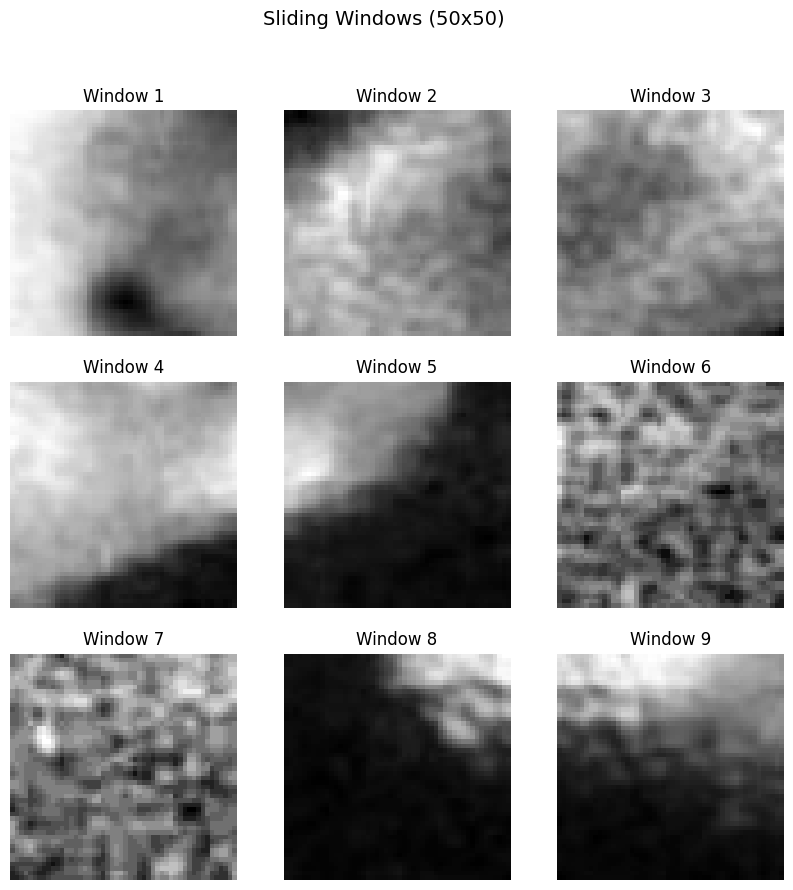

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load sample image from OpenCV
# You can also upload your own image
img = cv2.imread(cv2.samples.findFile("di.jpg"), cv2.IMREAD_GRAYSCALE)

# Show original image
plt.figure(figsize=(5,5))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

# -------- Padding Example --------
# Pad image with zeros (2 pixels on each side)
padded_img = np.pad(img, pad_width=2, mode='constant', constant_values=0)

plt.figure(figsize=(5,5))
plt.title("Zero Padded Image (2 pixels)")
plt.imshow(padded_img, cmap='gray')
plt.axis("off")
plt.show()

# -------- Sliding Window Example --------
def sliding_window(image, step_size, window_size):
    """
    Slide a window across the image.
    """
    for y in range(0, image.shape[0] - window_size[1] + 1, step_size):
        for x in range(0, image.shape[1] - window_size[0] + 1, step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Apply sliding window
window_size = (50, 50)  # width, height
step_size = 50

plt.figure(figsize=(10,10))
for i, (x, y, window) in enumerate(sliding_window(img, step_size, window_size)):
    if i >= 9:  # show only first 9 windows
        break
    plt.subplot(3,3,i+1)
    plt.imshow(window, cmap="gray")
    plt.title(f"Window {i+1}")
    plt.axis("off")
plt.suptitle("Sliding Windows (50x50)", fontsize=14)
plt.show()

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Upload an image (works in Jupyter)
from ipywidgets import FileUpload

upload_widget = FileUpload(accept='image/*', multiple=False)
display(upload_widget)

def get_uploaded_image():
    if len(upload_widget.value) == 0:
        return None
    else:
        # Read bytes from uploaded file
        file_info = next(iter(upload_widget.value.values()))
        file_bytes = file_info['content']
        # Convert bytes to numpy array
        nparr = np.frombuffer(file_bytes, np.uint8)
        # Decode to grayscale image using OpenCV
        img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
        return img

# Define convolution function with stride and padding
def conv2d(image, kernel, stride=1, padding=0):
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    k_h, k_w = kernel.shape
    i_h, i_w = image.shape

    out_h = (i_h - k_h)//stride + 1
    out_w = (i_w - k_w)//stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(out_h):
        for x in range(out_w):
            region = image[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

# Example kernel (edge detection)
kernel = np.array([[-1,-1,-1],
                   [-1, 8,-1],
                   [-1,-1,-1]])

# Interactive update function
def update(stride=1, padding=0):
    img = get_uploaded_image()
    if img is None:
        print("Please upload an image first!")
        return
    out_img = conv2d(img, kernel, stride=stride, padding=padding)
    plt.figure(figsize=(5,5))
    plt.title(f"Stride={stride}, Padding={padding}")
    plt.imshow(out_img, cmap="gray")
    plt.axis("off")
    plt.show()

# Create interactive sliders
interact(update,
         stride=widgets.IntSlider(min=1, max=5, step=1, value=1),
         padding=widgets.IntSlider(min=0, max=5, step=1, value=0))


Please upload an image first!


interactive(children=(IntSlider(value=1, description='stride', max=5, min=1), IntSlider(value=0, description='…

<function __main__.update(stride=1, padding=0)>

In [6]:
pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 26.4 MB/s  0:00:00

   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install google

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import cv2
from tkinter import Tk, Label, Button, Scale, filedialog, HORIZONTAL
from PIL import Image, ImageTk
import matplotlib.pyplot as plt

# Define convolution function with stride and padding
def conv2d(image, kernel, stride=1, padding=0):
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    k_h, k_w = kernel.shape
    i_h, i_w = image.shape

    out_h = (i_h - k_h)//stride + 1
    out_w = (i_w - k_w)//stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(out_h):
        for x in range(out_w):
            region = image[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

# Kernel (edge detection)
kernel = np.array([[-1,-1,-1],
                   [-1, 8,-1],
                   [-1,-1,-1]])

class ConvolutionGUI:
    def __init__(self, master):
        self.master = master
        master.title("Convolution GUI")

        self.label = Label(master, text="Upload an image")
        self.label.pack()

        self.upload_button = Button(master, text="Browse Image", command=self.upload_image)
        self.upload_button.pack()

        self.stride_slider = Scale(master, from_=1, to=5, orient=HORIZONTAL, label="Stride", command=self.update_image)
        self.stride_slider.set(1)
        self.stride_slider.pack()

        self.padding_slider = Scale(master, from_=0, to=5, orient=HORIZONTAL, label="Padding", command=self.update_image)
        self.padding_slider.set(0)
        self.padding_slider.pack()

        self.image_label = Label(master)
        self.image_label.pack()

        self.original_image = None

    def upload_image(self):
        file_path = filedialog.askopenfilename()
        if not file_path:
            return
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            self.label.config(text="Failed to load image.")
            return
        self.original_image = img
        self.label.config(text="Image loaded successfully!")
        self.update_image()

    def update_image(self, *args):
        if self.original_image is None:
            return
        stride = self.stride_slider.get()
        padding = self.padding_slider.get()
        output_img = conv2d(self.original_image, kernel, stride=stride, padding=padding)

        # Normalize image for display
        norm_img = cv2.normalize(output_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        img_pil = Image.fromarray(norm_img)
        img_tk = ImageTk.PhotoImage(img_pil)

        self.image_label.config(image=img_tk)
        self.image_label.image = img_tk

if __name__ == "__main__":
    root = Tk()
    gui = ConvolutionGUI(root)
    root.mainloop()


In [5]:
pip install ultralytics opencv-python pillow


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ----------------------------- ---------- 0.8/1.1 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.5 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 5.3 MB/s eta 0:00:08
   -- ------------------------------------- 2.1/38.5 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/38.5 MB 5.1 MB/s eta 0:00:07
   ---- ----------------------------------- 3.9/38.5 MB 5.1 MB/s eta 0:00:07
   ----- ---------------------------------- 5.2/38.5 MB 5.4 MB/s eta 0:00:07
   ------- -------------------------------- 6.8/38.5 MB 5.8 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.5 MB 6.2 MB/s eta 0:00:05
   ---------- ----------------------------- 10.2/38.5 MB 6.5 MB/s eta 0:00:05
   ------------ ----------

In [8]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
from ultralytics import YOLO
import os

# Load YOLOv8 model (can change to yolov8m.pt, yolov8l.pt, etc.)
model = YOLO("yolov8s.pt")

class ObjectDetectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Object Detection GUI - YOLOv8")
        self.root.geometry("800x600")

        self.label = tk.Label(root, text="Upload an image to detect objects", font=("Arial", 14))
        self.label.pack(pady=10)

        self.upload_button = tk.Button(root, text="Upload Image", command=self.upload_image, width=20)
        self.upload_button.pack()

        self.detect_button = tk.Button(root, text="Run Detection", command=self.run_detection, width=20, state=tk.DISABLED)
        self.detect_button.pack(pady=10)

        self.image_label = tk.Label(root)
        self.image_label.pack()

        self.original_image = None
        self.cv2_image = None

    def upload_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
        if not file_path:
            return

        self.cv2_image = cv2.imread(file_path)
        self.cv2_image = cv2.cvtColor(self.cv2_image, cv2.COLOR_BGR2RGB)

        img = Image.fromarray(self.cv2_image)
        img.thumbnail((700, 500))
        self.original_image = ImageTk.PhotoImage(img)

        self.image_label.config(image=self.original_image)
        self.detect_button.config(state=tk.NORMAL)
        self.label.config(text="Image loaded. Click 'Run Detection'.")

    def run_detection(self):
        if self.cv2_image is None:
            return

        results = model(self.cv2_image)[0]
        annotated_frame = results.plot()

        # Convert to PIL and display
        annotated_image = Image.fromarray(annotated_frame)
        annotated_image.thumbnail((700, 500))
        tk_img = ImageTk.PhotoImage(annotated_image)
        self.image_label.config(image=tk_img)
        self.image_label.image = tk_img
        self.label.config(text="Detection complete.")

if __name__ == "__main__":
    root = tk.Tk()
    app = ObjectDetectionApp(root)
    root.mainloop()



0: 384x640 3 persons, 1 tie, 1 suitcase, 73.3ms
Speed: 9.7ms preprocess, 73.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


In [1]:
import cv2
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8s.pt")  # You can change this to yolov8m.pt, yolov8l.pt, etc.

# Start webcam (0 = default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Run YOLOv8 detection
    results = model(frame, stream=True)

    # Annotate the frame with detection results
    for r in results:
        annotated_frame = r.plot()

    # Show the frame
    cv2.imshow("YOLOv8 - Real-time Detection", annotated_frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


Press 'q' to quit.

0: 480x640 (no detections), 112.6ms
Speed: 1.6ms preprocess, 112.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.7ms
Speed: 1.7ms preprocess, 83.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 87.2ms
Speed: 1.7ms preprocess, 87.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.3ms
Speed: 1.1ms preprocess, 91.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 81.7ms
Speed: 1.0ms preprocess, 81.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.5ms
Speed: 1.2ms preprocess, 80.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 79.6ms
Speed: 1.0ms preprocess, 79.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 81.9ms
Speed: 1.2ms